In [1]:
from utils import *
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/features_30_sec.csv')

In [3]:
# Identify Features and Target Label
y = data['label']
X = data.drop(columns = ['label','filename','length'])


In [4]:
# Scaling and Data Spiltting  
X = standardize(X)
X_dev, y_dev, X_test, y_test = split(X, y)


X_dev shape: (800, 57)
X_test shape: (200, 57)


### Original Model
Building a model with no parameter tuning and using the raw csv file

In [5]:
model_lr = LogisticRegression()
model_lr.fit(X_dev, y_dev)
predsDevlr = model_lr.predict(X_dev)
predsTestlr = model_lr.predict(X_test)

In [6]:
testlr_score =  accuracy_score(y_test, predsTestlr)
devlr_score = accuracy_score(y_dev, predsDevlr)

In [7]:
print("Classification Score for Logistic Regression on Dev dataset:\n")
print("Dev Score : ", devlr_score)
print(classification_report(y_dev, predsDevlr))
print("--------------------------------------------------------")
print("Classification Score for Logistic Regression on Test dataset:\n")
print("Test Score :", testlr_score)
print(classification_report(y_test, predsTestlr))

Classification Score for Logistic Regression on Dev dataset:

Dev Score :  0.72625
              precision    recall  f1-score   support

       blues       0.63      0.75      0.68        88
   classical       0.93      0.96      0.95        84
     country       0.72      0.63      0.67        78
       disco       0.64      0.65      0.65        78
      hiphop       0.78      0.65      0.71        81
        jazz       0.87      0.83      0.85        71
       metal       0.68      0.88      0.76        81
         pop       0.76      0.85      0.80        84
      reggae       0.70      0.67      0.68        78
        rock       0.55      0.36      0.44        77

    accuracy                           0.73       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.73      0.72       800

--------------------------------------------------------
Classification Score for Logistic Regression on Test dataset:

Test Score : 0.715
              preci

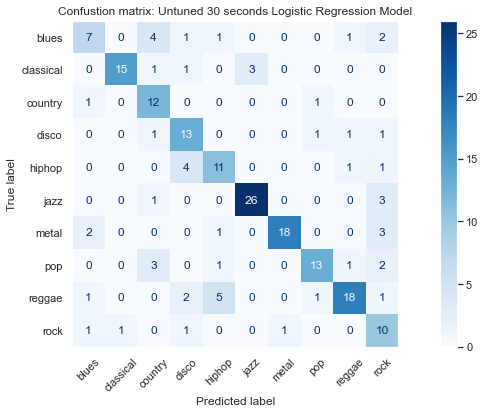

Accuracy : 0.71
Macro F-1 Score : 0.70


In [8]:
# Evaluate Model on Test set
class_labels = list(model_lr.classes_)
macro_f1, accuracy = evaluate_model(predsTestlr, y_test, class_labels, 'Confustion matrix: Untuned 30 seconds Logistic Regression Model')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Tuned Model
Building a model with hyperparameters tuning using 5-fold cross validation with GridSearchCV and the raw csv file

In [9]:

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }

print(parameters)

{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [ ]:
tune_lr = GridSearchCV(estimator = model_lr, param_grid = parameters, cv = 5)
tune_lr.fit(X_dev, y_dev)

In [ ]:
print("Best Score :", tune_lr.best_score_)
print("Best Parameters :",tune_lr.best_params_)

In [ ]:
predsDevlr_tuned = tune_lr.predict(X_dev)
predsTestlr_tuned = tune_lr.predict(X_test)

print("Score on Dev data for LR using GridSearchCV:", accuracy_score(y_dev, predsDevlr_tuned))
print("Score on Test data for LR using GridSearchCV:",accuracy_score(y_test, predsTestlr_tuned))

In [ ]:
# Evaluate Model on Test set
class_labels = list(model_lr.classes_)
macro_f1, accuracy = evaluate_model(predsTestlr_tuned, y_test, class_labels, 'Confustion matrix: Tuned 30 seconds Logistic Regression Model')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Dimensionality reduction of data using PCA

In [ ]:
# Principal Component Analysis 
### cite : https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

# create the PCA instance
pca = PCA(n_components=30)
# fit on data
pca_data = pca.fit_transform(X_dev)
pca_data_test = pca.transform(X_test)
# pca_data_dev = pca.transform(X_dev)
PCA_df= pd.DataFrame(data=pca_data)
y_dev.index = PCA_df.index
pca_final=pd.concat([PCA_df,y_dev], axis = 1)
# access values
print("Explained Variance of each component:",pca.explained_variance_)
print("Sum of Explained Variance:", sum(pca.explained_variance_ratio_))

In [ ]:
pca_final.head()

### PCA - Original Model
Building a model with no parameter tuning and using the PCA data

In [ ]:
model_pca = LogisticRegression()
model_pca.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainlr = model_pca.predict(pca_data)
pcaTestlr = model_pca.predict(pca_data_test)

In [ ]:
pcatestlr_score =  accuracy_score(y_test, pcaTestlr)
pcalr_score = accuracy_score(y_dev, pcaTrainlr)

In [ ]:
print("Classification Score for Logistic Regression on Train dataset:\n")
print("Train Score : ", pcalr_score)
print("--------------------------------------------------------")
print("Classification Score for Logistic Regression on Test dataset:\n")
print("Test Score :", pcatestlr_score)

In [ ]:
# Evaluate Model
class_labels = list(model_lr.classes_)
macro_f1, accuracy = evaluate_model(pcaTestlr, y_test, class_labels, 'Confustion Matrix: PCA - Untuned 30 seconds Logistic Regression Model')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### PCA - Tuned Model
Building a model with hyperparameters tuning using 5-fold cross validation with GridSearchCV and the PCA data

In [ ]:
pca_final.iloc[:,:30]

In [ ]:
model_pca_tuned = tune_lr
model_pca_tuned.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainlr_tuned = model_pca_tuned.predict(pca_data)
pcaTestlr_tuned = model_pca_tuned.predict(pca_data_test)

In [ ]:
pcatestlr_score =  accuracy_score(y_test, pcaTestlr)
pcalr_score = accuracy_score(y_dev, pcaTrainlr)

In [ ]:
print("Classification Score for Logistic Regression on Train dataset:\n")
print("Train Score : ", pcalr_score)
print("--------------------------------------------------------")
print("Classification Score for Logistic Regression on Test dataset:\n")
print("Test Score :", pcatestlr_score)

In [ ]:
# Evaluate Model
class_labels = list(model_lr.classes_)
macro_f1, accuracy = evaluate_model(pcaTestlr, y_test, class_labels, 'Confustion Matrix: PCA - Tuned 30 seconds Logistic Regression Model')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

**Ans:** As we see due to the lesser number of data, PCA instead of helping in the improvement of the accuracy or the model learning by reducing the dimensions ("the curse of dimensionality"), makes the model worse. 